** Step - 1 : Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

**Step - 2 : Load Dataset**

Attribute Information:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

In [2]:
dataset = pd.read_csv('iris.data',header=None)
dataset.columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Class']

In [3]:
dataset.head() # top five rows

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


*Check for missing values*

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal Length    150 non-null float64
Petal Width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


**Step - 3 : Convert dataframe into array and extract indenpende and dependent** 

In [5]:
X = dataset.iloc[:,[1,3]].values # independent varibles
y = dataset.iloc[:,-1].values # dependent variables

In [6]:
y = y.reshape(-1,1) # coloumn matrix
# y = y.reshape(1,-1) # row matrix

In [7]:
X.shape, y.shape

((150, 2), (150, 1))

** Step -4 : Data Preprocessing **
    - missing values
    - categorical data

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label = LabelEncoder()

In [10]:
y = label.fit_transform(y)

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

**Step - 5: Visualize if possible**

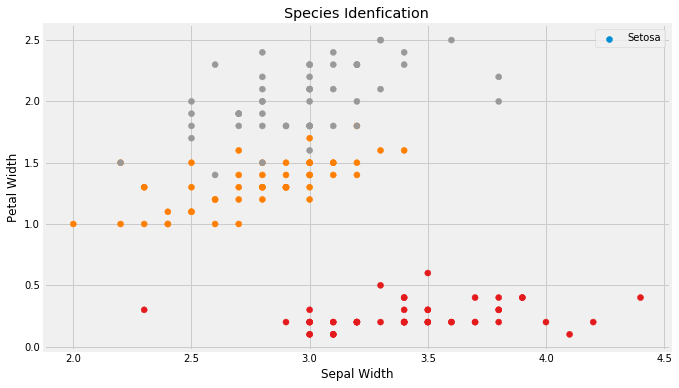

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c = y, cmap = 'Set1')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Species Idenfication')
plt.legend(['Setosa','Versicolor','Viginica'])
plt.show()

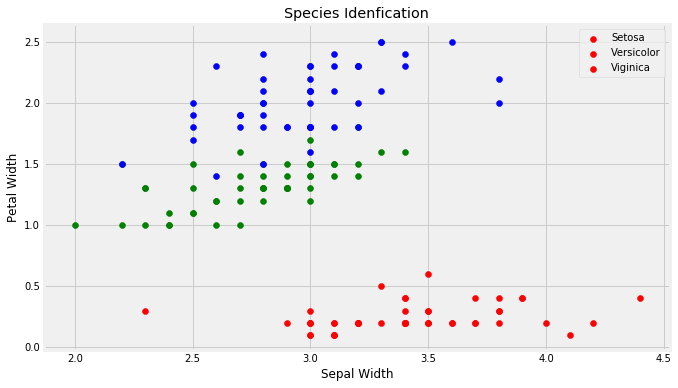

In [13]:
plt.figure(figsize=(10,6))
for i in range(len(y)):
    #print(i)
    if y[i] == 0:
        col = 'red'
    elif y[i] == 1:
        col = 'green'
    else:
        col = 'blue'
        
    plt.scatter(X[i,0],X[i,1],color = col)
    
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Species Idenfication')
plt.legend(['Setosa','Versicolor','Viginica'])
plt.show()

** Step -5 : Spliting data into traning and testing sets**

In [14]:
from sklearn.cross_validation import train_test_split

C:\Users\srikanth\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.30)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 2), (45, 2), (105,), (45,))

** Step - 6: Classification**

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
model_log = LogisticRegression()
model_knn = KNeighborsClassifier(n_neighbors=5)
model_svm = SVC(kernel = 'linear')
model_dt =  DecisionTreeClassifier()
model_rf = RandomForestClassifier(n_estimators= 100)

*traning*

In [19]:
model_log.fit(x_train, y_train) # training 
model_knn.fit(x_train, y_train) # training 
model_svm.fit(x_train, y_train) # training 
model_dt.fit(x_train, y_train) # training 
model_rf.fit(x_train, y_train) # training 

y_pred_log = model_log.predict(x_test) # predicting
y_pred_knn = model_knn.predict(x_test) # predicting
y_pred_svm = model_svm.predict(x_test) # predicting
y_pred_dt = model_dt.predict(x_test) # predicting
y_pred_rf = model_rf.predict(x_test) # predicting

**Step -7 : Evaluating**

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
cm_log = confusion_matrix(y_test, y_pred_log)
cr_log = classification_report(y_test, y_pred_log)
# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
cr_knn = classification_report(y_test, y_pred_knn)
# SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
cr_svm = classification_report(y_test, y_pred_svm)
# DT
cm_dt = confusion_matrix(y_test, y_pred_dt)
cr_dt = classification_report(y_test, y_pred_dt)
# RF
cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf)

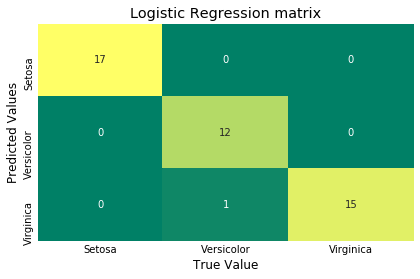

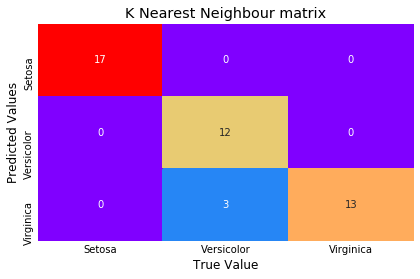

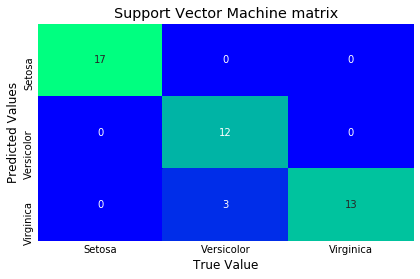

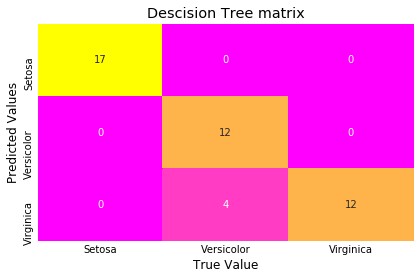

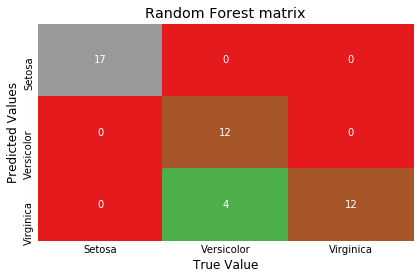

In [21]:
sns.heatmap(cm_log,annot=True,cbar=False,
           xticklabels=['Setosa','Versicolor','Virginica'],
           yticklabels=['Setosa','Versicolor','Virginica'], cmap = 'summer')
plt.title('Logistic Regression matrix')
plt.xlabel('True Value')
plt.ylabel('Predicted Values')
plt.show()
# KNN
sns.heatmap(cm_knn,annot=True,cbar=False,
           xticklabels=['Setosa','Versicolor','Virginica'],
           yticklabels=['Setosa','Versicolor','Virginica'], cmap = 'rainbow')
plt.title('K Nearest Neighbour matrix')
plt.xlabel('True Value')
plt.ylabel('Predicted Values')
plt.show()
# SVM
sns.heatmap(cm_svm,annot=True,cbar=False,
           xticklabels=['Setosa','Versicolor','Virginica'],
           yticklabels=['Setosa','Versicolor','Virginica'], cmap = 'winter')
plt.title('Support Vector Machine matrix')
plt.xlabel('True Value')
plt.ylabel('Predicted Values')
plt.show()
# DT
sns.heatmap(cm_dt,annot=True,cbar=False,
           xticklabels=['Setosa','Versicolor','Virginica'],
           yticklabels=['Setosa','Versicolor','Virginica'], cmap = 'spring')
plt.title('Descision Tree matrix')
plt.xlabel('True Value')
plt.ylabel('Predicted Values')
plt.show()
# RF
sns.heatmap(cm_rf,annot=True,cbar=False,
           xticklabels=['Setosa','Versicolor','Virginica'],
           yticklabels=['Setosa','Versicolor','Virginica'], cmap = 'Set1')
plt.title('Random Forest matrix')
plt.xlabel('True Value')
plt.ylabel('Predicted Values')
plt.show()

In [22]:
print('='*20 + 'Logistic Regression'+ '='*20 + '\n')
print(cr_log)
print('\n')
print('='*20 + 'K Nearest Neighbour'+ '='*20 + '\n')
print(cr_knn)
print('\n')
print('='*20 + 'Support Vector Machine'+ '='*20 + '\n')
print(cr_svm)
print('\n')
print('='*20 + 'Desicion Tree'+ '='*20 + '\n')
print(cr_dt)
print('\n')
print('='*20 + 'Random Forest'+ '='*20 + '\n')
print(cr_rf)
print('\n')

====================Logistic Regression====================

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        17
          1       0.92      1.00      0.96        12
          2       1.00      0.94      0.97        16

avg / total       0.98      0.98      0.98        45



====================K Nearest Neighbour====================

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        17
          1       0.80      1.00      0.89        12
          2       1.00      0.81      0.90        16

avg / total       0.95      0.93      0.93        45



====================Support Vector Machine====================

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        17
          1       0.80      1.00      0.89        12
          2       1.00      0.81      0.90        16

avg / total       0.95      0.93      0.93        45



====

# Visualiztion

In [23]:
from matplotlib.colors import ListedColormap

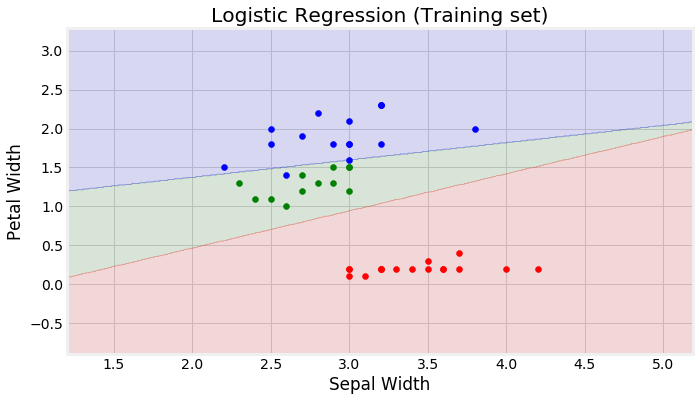

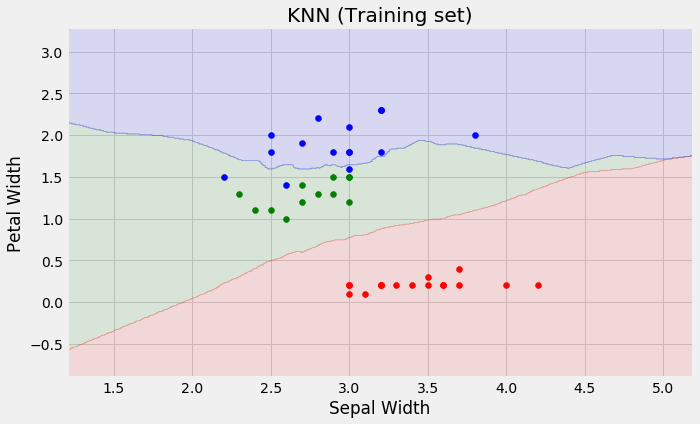

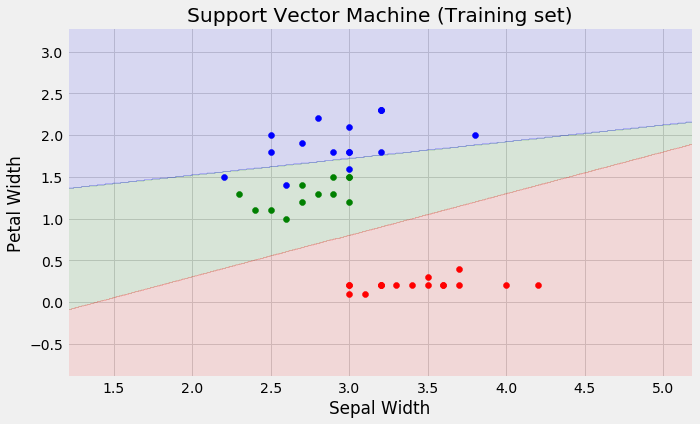

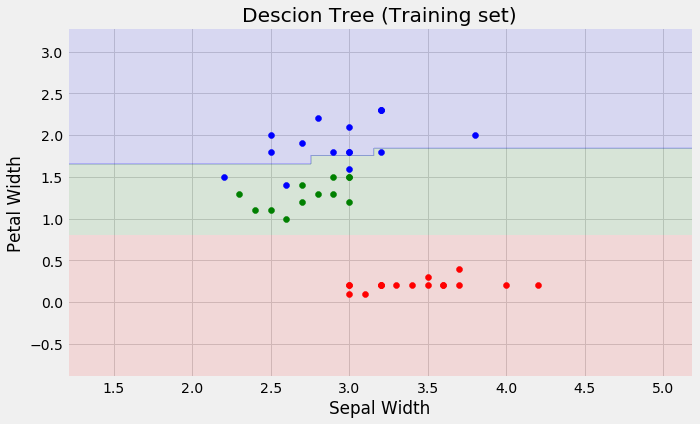

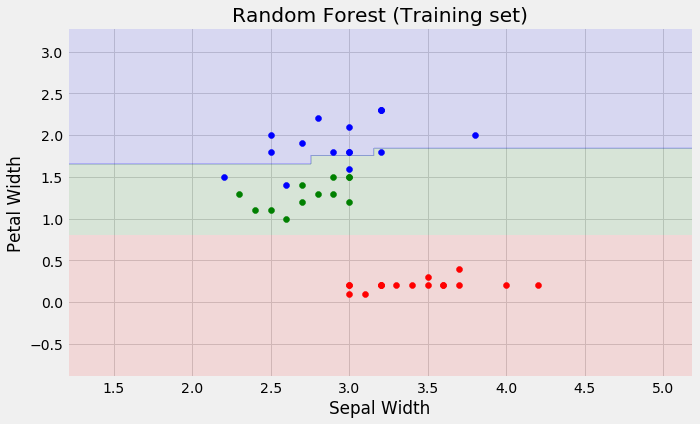

In [24]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_log.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.1, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i in range(len(y_set)):
    if y_set[i] == 0:
        c = 'red'
    elif y_set[i] == 1:
        c = 'green'
        
    else:
        c = 'blue'
        
    plt.scatter(X_set[i,0], X_set[i,1],color = c)
    

plt.title('Logistic Regression (Training set)')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
#plt.legend()
plt.show()


# KNN
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.1, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i in range(len(y_set)):
    if y_set[i] == 0:
        c = 'red'
    elif y_set[i] == 1:
        c = 'green'
        
    else:
        c = 'blue'
        
    plt.scatter(X_set[i,0], X_set[i,1],color = c)
    

plt.title('KNN (Training set)')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
#plt.legend()
plt.show()


plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.1, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i in range(len(y_set)):
    if y_set[i] == 0:
        c = 'red'
    elif y_set[i] == 1:
        c = 'green'
        
    else:
        c = 'blue'
        
    plt.scatter(X_set[i,0], X_set[i,1],color = c)
    

plt.title('Support Vector Machine (Training set)')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
#plt.legend()
plt.show()


# KNN
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_dt.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.1, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i in range(len(y_set)):
    if y_set[i] == 0:
        c = 'red'
    elif y_set[i] == 1:
        c = 'green'
        
    else:
        c = 'blue'
        
    plt.scatter(X_set[i,0], X_set[i,1],color = c)
    

plt.title('Descion Tree (Training set)')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
#plt.legend()
plt.show()



# KNN
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_dt.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.1, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i in range(len(y_set)):
    if y_set[i] == 0:
        c = 'red'
    elif y_set[i] == 1:
        c = 'green'
        
    else:
        c = 'blue'
        
    plt.scatter(X_set[i,0], X_set[i,1],color = c)
    

plt.title('Random Forest (Training set)')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
#plt.legend()
plt.show()